In [1]:
import warnings
warnings.filterwarnings("ignore")

#pandas libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for Box-Cox Transformation
from scipy import stats


# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# read in all our data
data=pd.read_csv("ks-projects-201801.csv")
df=pd.DataFrame(data)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Scaling

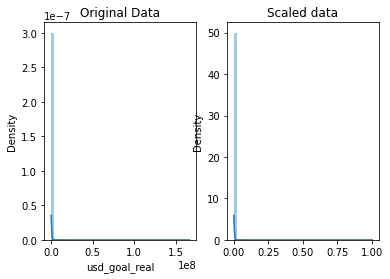

In [2]:
# select the usd_goal_real column
usd_goal = df.usd_goal_real

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

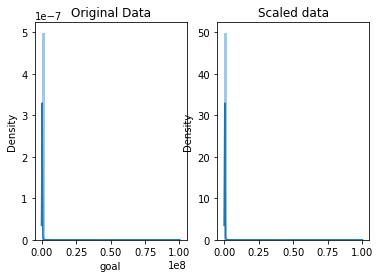

In [3]:
# We just scaled the "usd_goal_real" column. What about the "goal" column?

# select the ugoal column
usd_goal = df.goal

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df.goal, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

### Normalization

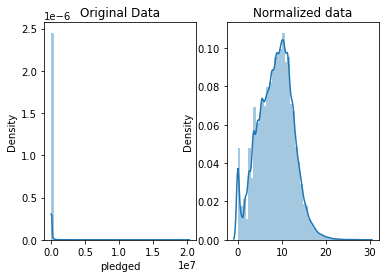

In [4]:
# Your turn! 
# We looked as the usd_pledged_real column. What about the "pledged" column? Does it have the same info?
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = df.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges = df.pledged.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()